<a href="https://colab.research.google.com/github/walysson21/AgriVis_Dataset/blob/main/AgriVis_Visualiza_Mosaico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

dataset_path = '/content/drive/MyDrive/ColabAux/walysson2107/AgriVis/dataset'
train_im_path = dataset_path+'/images/rgb/' 
nir_im_path = dataset_path+'/images/nir/'

In [ ]:
def kmeans(img, k):
  #Get image height and width
  rows, cols = img.shape[:]

  #Image two-dimensional pixel conversion to one-dimensional
  data = img.reshape((rows * cols))
  data = np.float32(data)

  #Definition Center (type,max_iter,epsilon)
  criteria = (cv2.TERM_CRITERIA_EPS +
              cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

  #Set label
  flags = cv2.KMEANS_RANDOM_CENTERS

  #K-Means clustering into 4 categories
  compactness, labels, centers = cv2.kmeans(data, k, None, criteria, 10, flags)

  #Generate final image
  res = centers[labels.flatten()]
  dst = res.reshape((img.shape[0],img.shape[1]))

  return dst

In [ ]:
def gera_mosaico(x_num_im, y_num_im, grade, fig_size_x=16, fig_size_y=16, ndvi_show=False, k=0, threshold_prep=-1, threshold_mad=-1):
  margem = int(grade/2)

  if x_num_im >= margem:
    x_num_im -= margem
    if y_num_im >= margem:
      y_num_im -= margem

  print(x_num_im, y_num_im)
  plt.figure(figsize=(fig_size_x, fig_size_y))
  for i in range(0,grade):
    for j in range(1,grade+1):
      im_name = 'X-4503669-4661608_Y-1044137-1440490_M_y'+str(y_num_im)+'_x'+str(x_num_im)+'.PNG'
      #print(im_name)
      im_path = train_im_path+im_name
      nir_path = nir_im_path+im_name
      
      try:
        im = np.array(Image.open(im_path))
        plt.subplot(grade,grade,i*grade+j)
        if ndvi_show:
          im_nir = np.array(Image.open(nir_path), dtype='float32')
          ndvi = np.divide(np.subtract(im_nir, im[...,0]), np.add(im_nir, im[...,0]))
          #ndvi = np.divide(np.subtract(im[...,1], im_nir), np.add(im_nir, im[...,1])) # ndwi
          #evi = 2.5 * np.divide(np.subtract(im_nir, im[...,0]), (np.add(im_nir, 2.4 * im[...,0]) + 1)) # EVI
          #ndvi = np.divide(np.subtract(im[...,1], im_nir), np.add(im_nir, im[...,1]))
          #index = 1.22 * (B08 - 1.22 * B04 - 0.03) / (1.22 * B08 + B04 - 1.22 * 0.03 + 0.08 * (1.0 + Math.pow(1.22, 2.0))) # SAVI
          if k > 0:
            ndvi = kmeans(ndvi, k)
          if threshold_prep > -1:
            ndvi[ndvi<=threshold_prep] = -1
            ndvi[ndvi>threshold_mad] = 1
          plt.imshow(ndvi, cmap='RdYlGn')
        else:
          plt.imshow(im)
        plt.axis('off')
      except:
        print("Erro ao encontrar a imagem: ", im_name)
      
      x_num_im += 1
    y_num_im += 1
    x_num_im -= grade
  
  plt.subplots_adjust(wspace=0.005, hspace=0.005)
  
  if ndvi_show:
    cax = plt.axes([0.92, 0.13, 0.02, 0.74])
    plt.colorbar(cax=cax)
    plt.show()

8 14


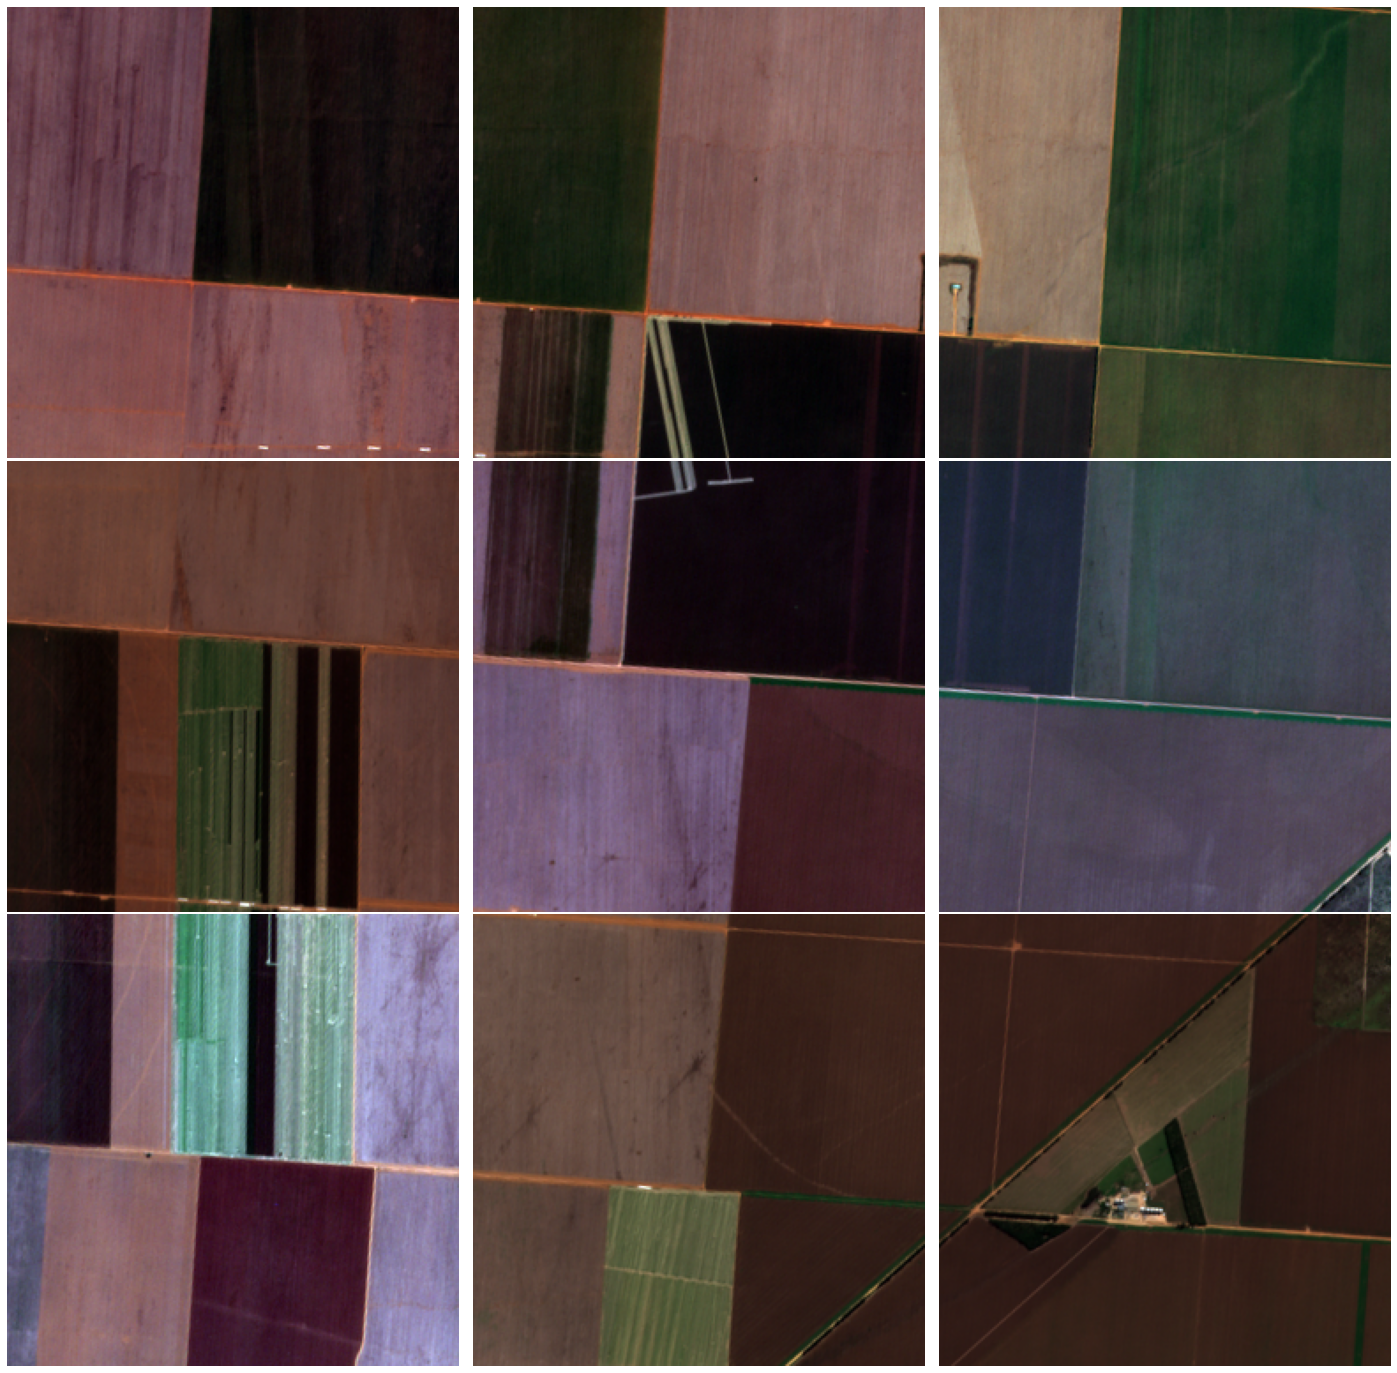

In [ ]:
y_im = 15
x_im = 9
grade = 3
gera_mosaico(x_num_im=x_im, y_num_im=y_im, fig_size_x=25, fig_size_y=25, grade=grade, ndvi_show=False)

1 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


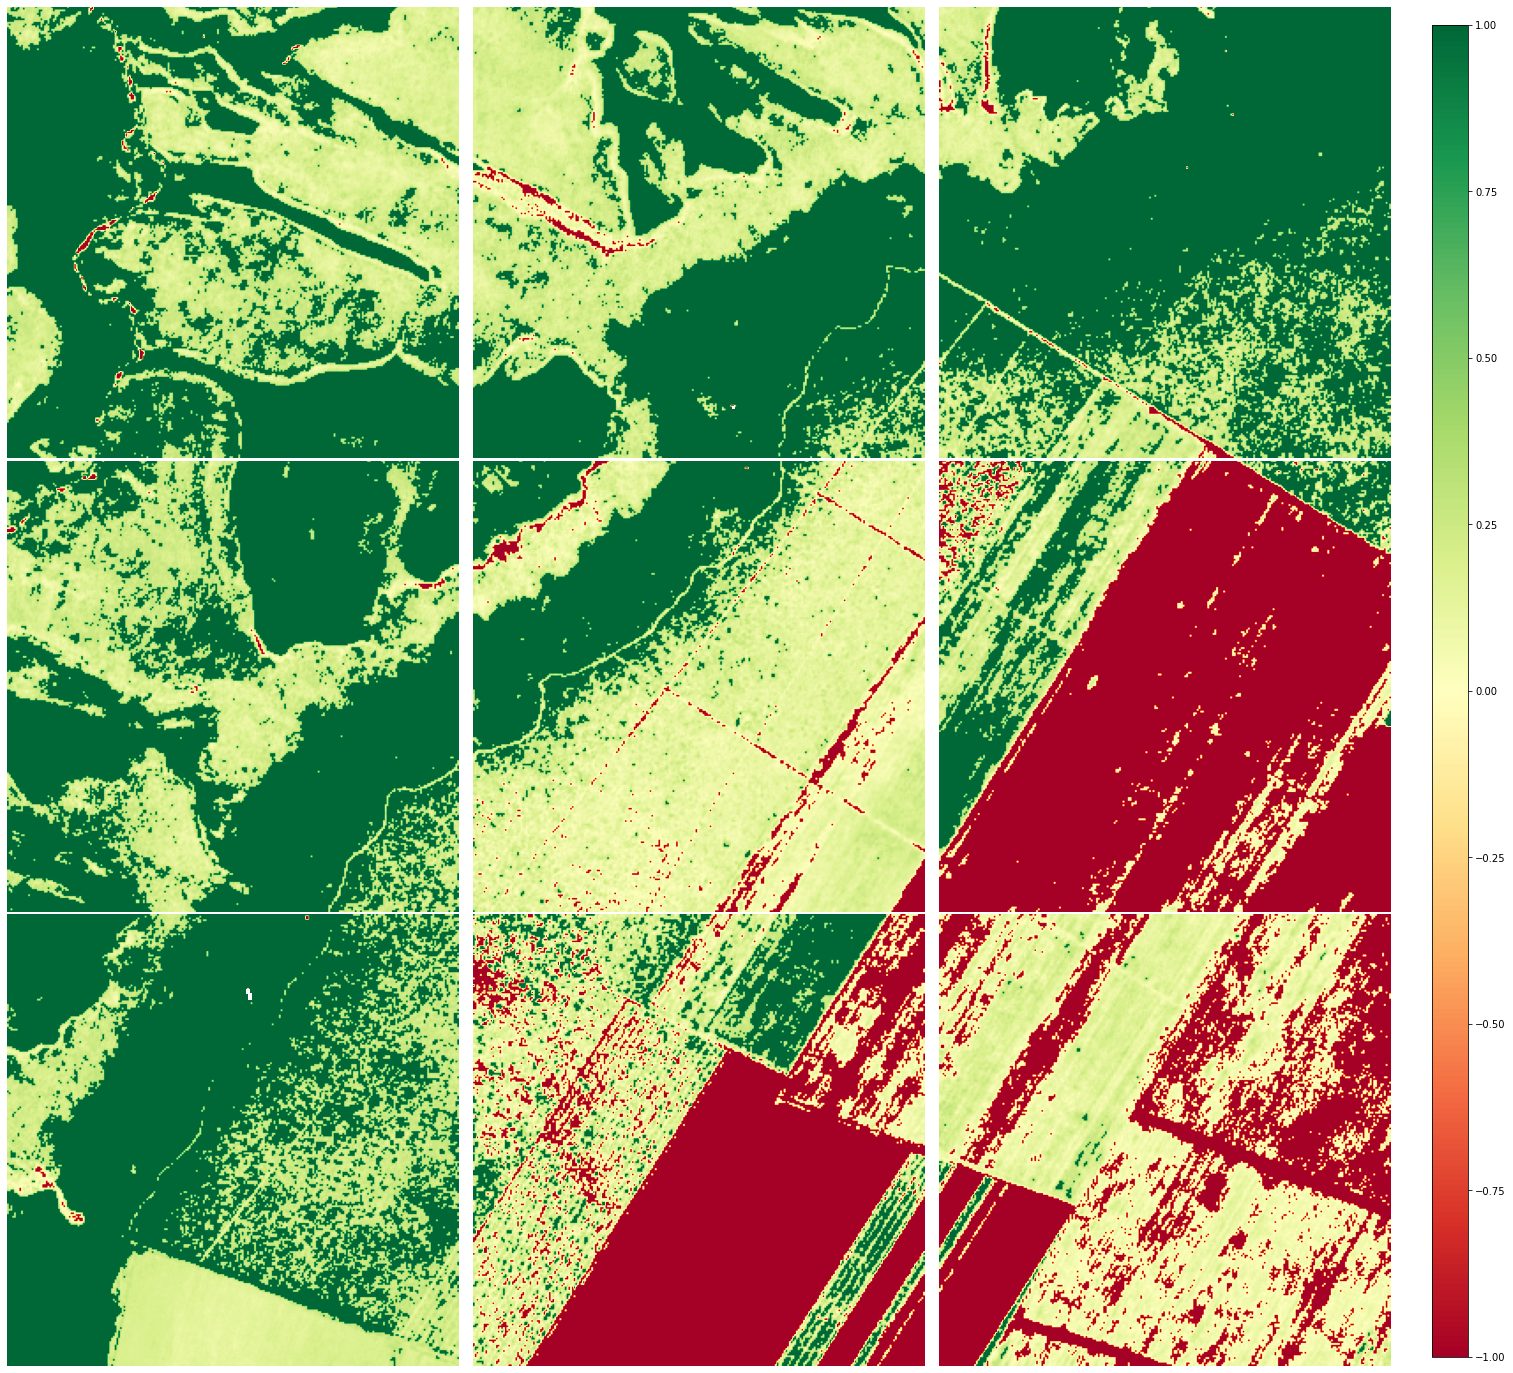

In [ ]:
gera_mosaico(x_num_im=x_im, y_num_im=y_im, grade=grade, ndvi_show=True, threshold_prep=0.0, threshold_mad=0.3, fig_size_x=25, fig_size_y=25)

46 5


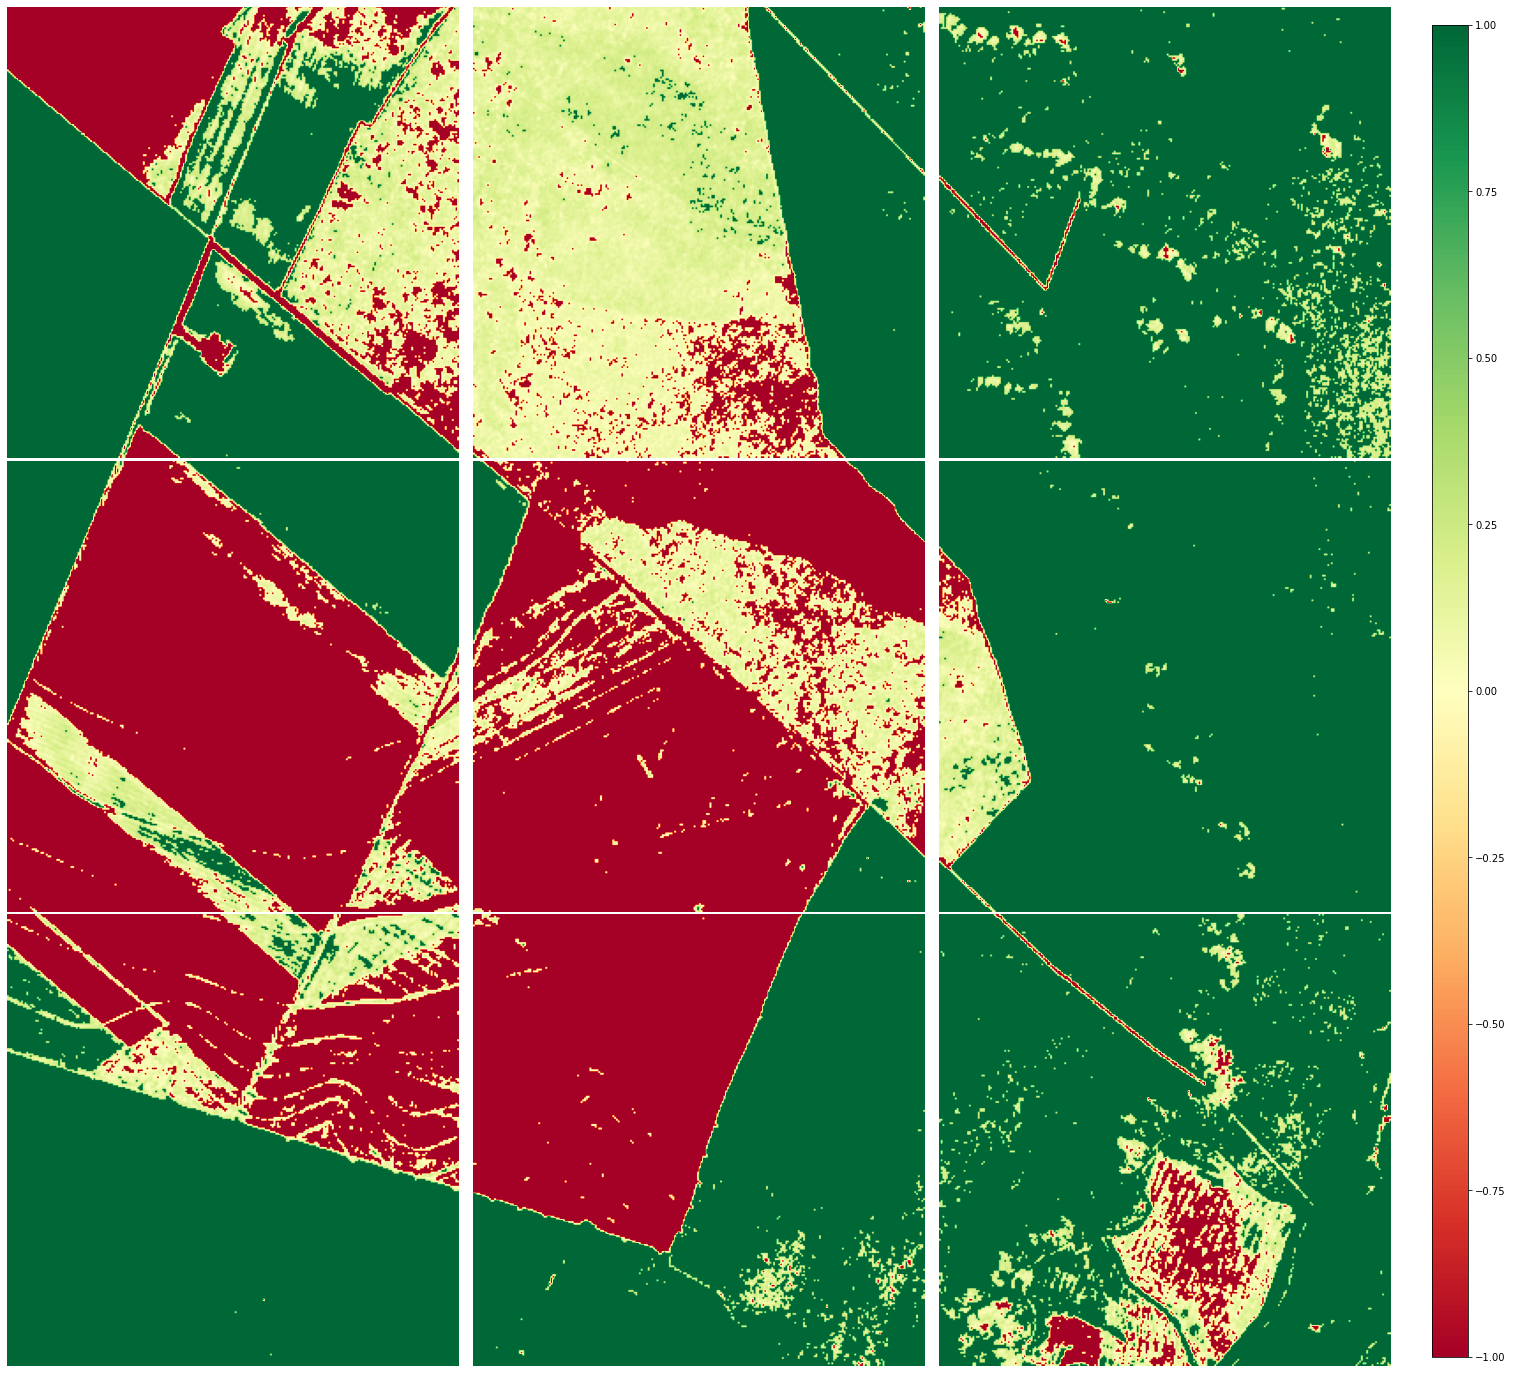

In [ ]:
gera_mosaico(x_num_im=x_im, y_num_im=y_im, grade=grade, ndvi_show=True, threshold_prep=0.0, threshold_mad=0.25, fig_size_x=25, fig_size_y=25)

30 159
Erro ao encontrar a imagem:  X-4503669-4661608_Y-1044137-1440490_M_y159_x30.PNG
Erro ao encontrar a imagem:  X-4503669-4661608_Y-1044137-1440490_M_y160_x30.PNG
Erro ao encontrar a imagem:  X-4503669-4661608_Y-1044137-1440490_M_y160_x32.PNG
Erro ao encontrar a imagem:  X-4503669-4661608_Y-1044137-1440490_M_y161_x30.PNG
Erro ao encontrar a imagem:  X-4503669-4661608_Y-1044137-1440490_M_y161_x32.PNG


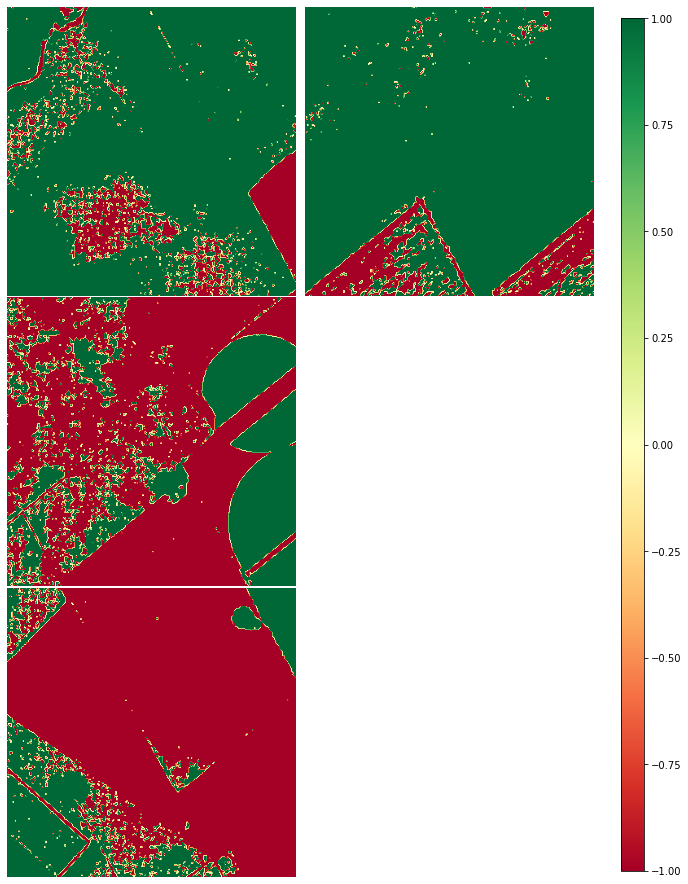

In [ ]:
gera_mosaico(x_num_im=x_im, y_num_im=y_im, grade=grade, ndvi_show=True, threshold_prep=0, threshold_mad=0)

15 0


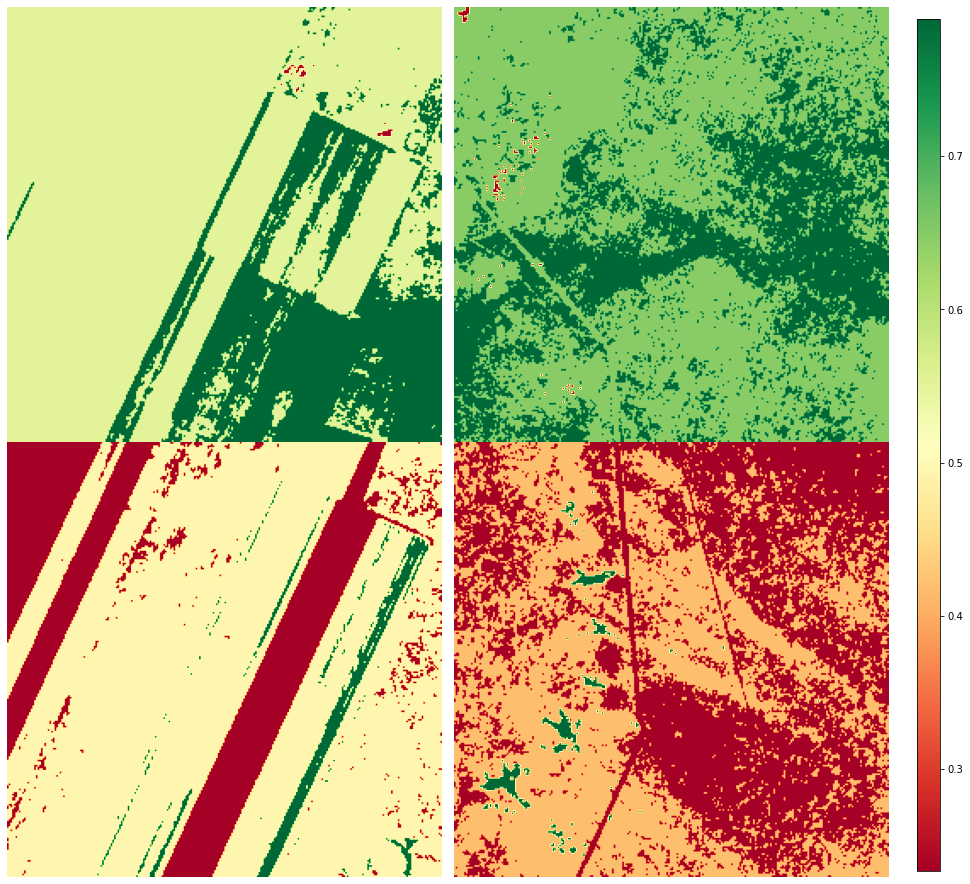

In [ ]:
gera_mosaico(x_num_im=x_im, y_num_im=y_im, grade=2, ndvi_show=True, k=3)

31 2


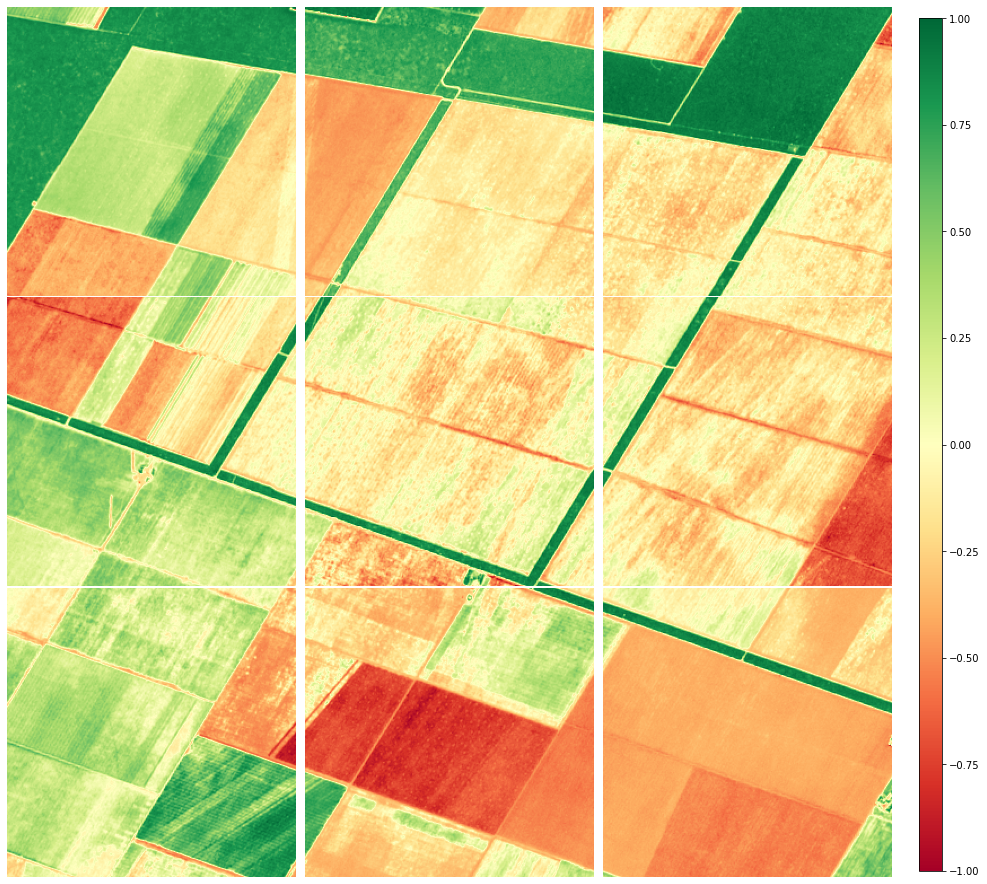

In [ ]:
gera_mosaico(x_num_im=x_im, y_num_im=y_im, grade=grade, ndvi_show=True)